In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold

In [3]:
train = pd.read_csv('train_North_America.csv')
test = pd.read_csv('test_North_America.csv')

train

Life Expectancy at birth        BMI  Alcohol  gender_dummy  2000  2010  \
0                       76.12  29.800000     2.96             1     0     1   
1                       83.58  26.600000     4.07             1     0     0   
2                       74.88  25.033333    15.09             0     0     0   
3                       57.18  22.300000     6.54             1     1     0   
4                       67.85  25.600000     0.70             0     0     0   
..                        ...        ...      ...           ...   ...   ...   
112                     77.66  28.600000     4.35             1     0     0   
113                     67.57  25.800000     1.40             0     0     0   
114                     68.12  26.800000     1.54             0     0     0   
115                     70.77  25.300000     2.06             0     1     0   
116                     78.51  28.600000     6.10             1     0     1   

     2015  2019  Infectious_and_parasitic_diseases  Respiratory_infectious  \
0       0     0                           0.050640                0.031144   
1       1     0                           1.000493                4.366796   
2       0     1                           0.005074                0.011340   
3       0     0                          10.695487                4.558246   
4       1     0                           2.792654                4.738262   
..    ...   ...                                ...                     ...   
112     0     1                           0.021215                0.124438   
113     1     0                           1.618232                0.888155   
114     1     0                           0.901592                1.281269   
115     0     0                           0.801145                0.806148   
116     0     0                           0.268400                0.149821   

     ...  unintentional_injuries  intentional_injuries  \
0    ...                0.025518              0.020842   
1    ...                4.430101              1.402133   
2    ...                0.024694              0.001754   
3    ...                2.247815              0.739152   
4    ...                4.688139              4.607233   
..   ...                     ...                   ...   
112  ...                0.048537              0.009322   
113  ...                1.936116              4.744601   
114  ...                1.649280              4.069564   
115  ...                1.155029              0.694038   
116  ...                0.176260              0.326030   

     mental_substance_disorders  sense_organ  musculoskeletal  congenital  \
0                      0.000884     0.000000         0.003647    0.016123   
1                      1.351209     0.008108         1.143552    0.469198   
2                      0.004491     0.000000         0.000327    0.002376   
3                      0.078607     0.000000         0.107055    0.899299   
4                      1.649894     0.065878         0.123499    0.514923   
..                          ...          ...              ...         ...   
112                    0.000803     0.000000         0.014937    0.007686   
113                    0.435531     0.061013         0.090866    0.330028   
114                    0.811724     0.189594         0.068840    0.267978   
115                    0.199678     0.000000         0.025468    0.632348   
116                    0.004570     0.000000         0.037840    0.077917   

     sudden_infant_death_syndrome  skin_diseases  diabetes_mellitus  \
0                        0.001284       0.002166           0.060240   
1                        0.015312       0.379625           2.533106   
2                        0.000087       0.005613           0.022083   
3                        0.029912       0.148953           2.774393   
4                        0.000000       0.000000           2.690095   
..                            ...            ...                ...   


In [4]:
X_train = train.drop(["Life Expectancy at birth"], axis=1)
y_train = train["Life Expectancy at birth"]
X_test = test.drop(["Life Expectancy at birth"], axis=1)
y_test = test["Life Expectancy at birth"]

In [33]:
import statsmodels.api as sm #package to do linear regression

X_train_lin = sm.add_constant(X_train)
model_lin = sm.OLS(y_train, X_train_lin).fit()
print(model_lin.summary())

                               OLS Regression Results                               
Dep. Variable:     Life Expectancy at birth   R-squared:                       0.908
Model:                                  OLS   Adj. R-squared:                  0.880
Method:                       Least Squares   F-statistic:                     32.61
Date:                      Mon, 08 May 2023   Prob (F-statistic):           2.88e-35
Time:                              06:34:19   Log-Likelihood:                -262.31
No. Observations:                       117   AIC:                             580.6
Df Residuals:                            89   BIC:                             658.0
Df Model:                                27                                         
Covariance Type:                  nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [34]:
def OSR22(model, df_train, df_test, dependent_var):   
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)
    return 1 - SSE/SST 


OSR22(model1, train, test, 'Life Expectancy at birth')

0.4472618748315601

In [5]:
dtr = DecisionTreeRegressor(min_samples_split=10, 
                            ccp_alpha=0.02,
                            random_state = 88)
dtr = dtr.fit(X_train, y_train)

Node count = 45


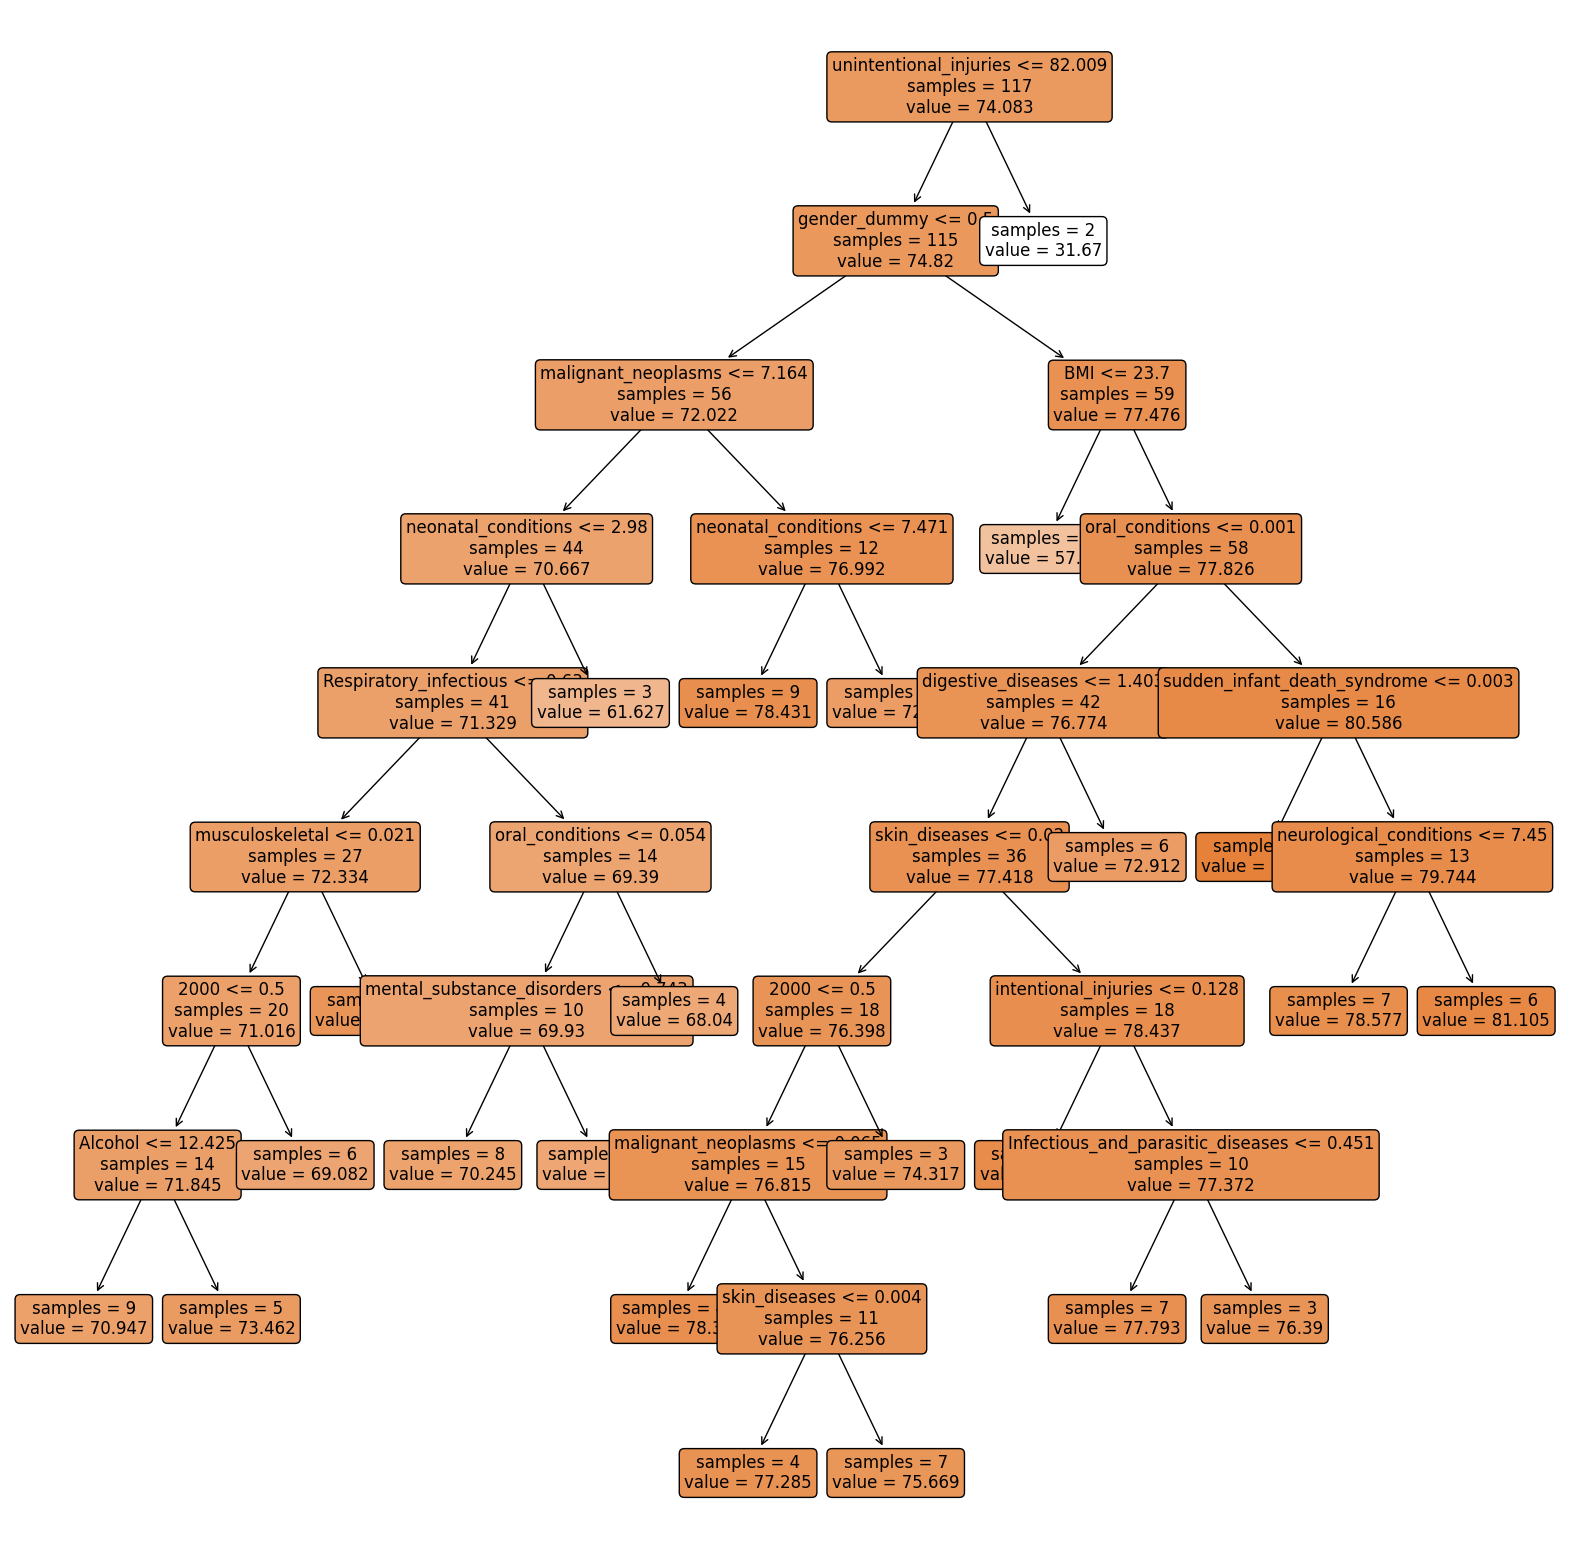

In [6]:
print('Node count =', dtr.tree_.node_count)
plt.figure(figsize=(20,20))
plot_tree(dtr, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

In [7]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [8]:
print('OSR2:', OSR2(dtr, X_test, y_test, y_train))

OSR2: 0.665238228116752


In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()

In [10]:
print('OSR2:', OSR2(rf, X_test, y_test, y_train))

OSR2: 0.7539100695101068


In [11]:
grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5,10,20],
               'min_samples_split': [5,10,20],
               'max_depth': [10,20,30],
               'random_state': [88]}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

dtr = DecisionTreeRegressor()
dtr_cv = GridSearchCV(dtr, param_grid = grid_values, scoring = 'r2', cv=cv, verbose=0)
dtr_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017...
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20],
                         'random_state': [88]},
             scoring='r2')

In [12]:
print(dtr_cv.best_params_)

{'ccp_alpha': 0.0, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'random_state': 88}


In [13]:
dtr_cv_acc = DecisionTreeRegressor(ccp_alpha=0, max_depth=10, min_samples_leaf=5, min_samples_split=5, random_state=88)
dtr_cv_acc.fit(X_train, y_train)

y_pred = dtr_cv_acc.predict(X_test)

Node count = 37


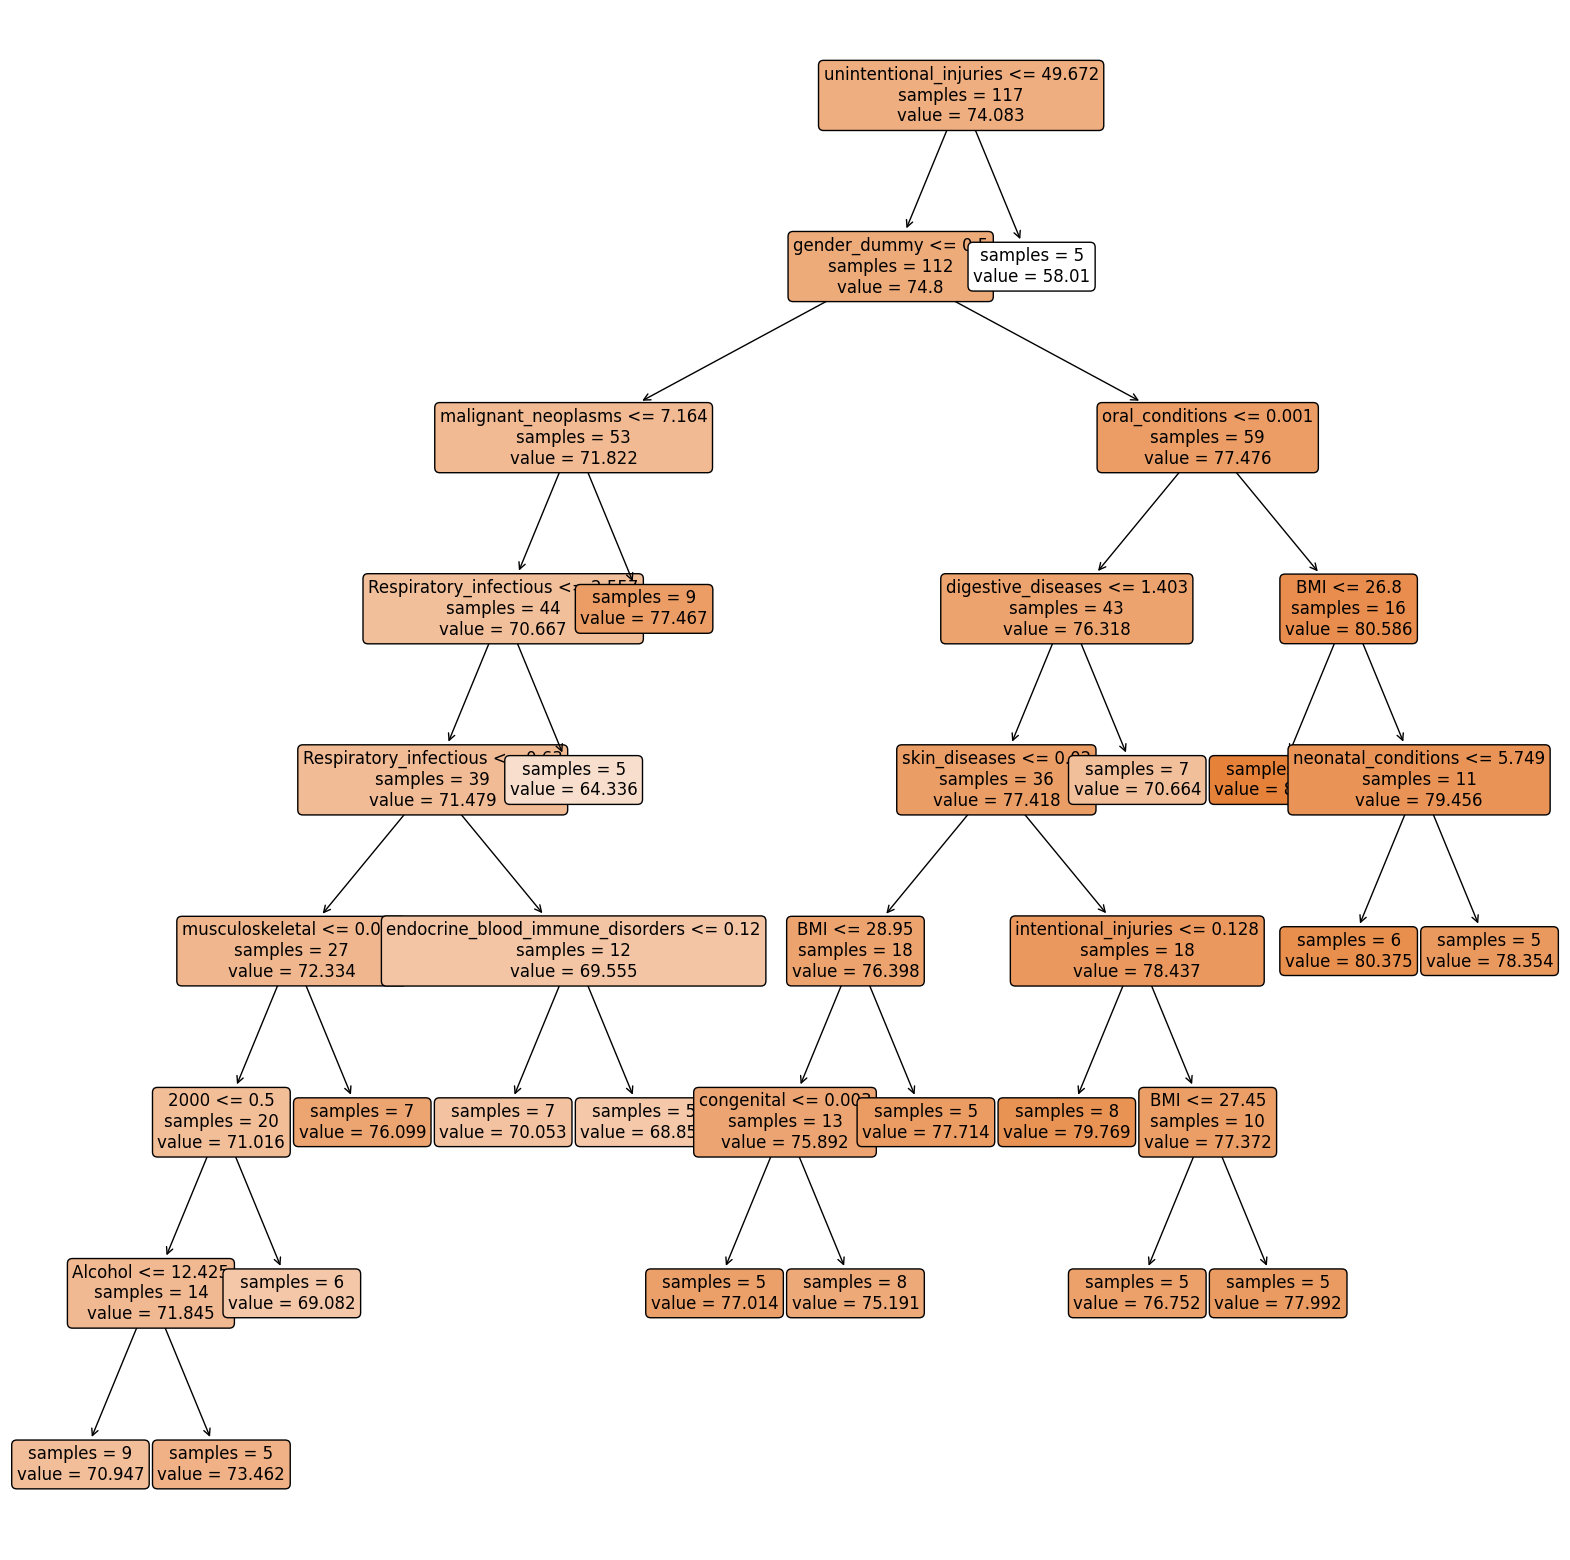

In [14]:
print('Node count =', dtr_cv_acc.tree_.node_count)
plt.figure(figsize=(20,20))
plot_tree(dtr_cv_acc, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

In [15]:
print('OSR2:', OSR2(dtr_cv_acc, X_test, y_test, y_train))

OSR2: 0.4448437495041304


In [16]:
features = dtr_cv_acc.feature_names_in_

In [17]:
importance = dtr_cv_acc.feature_importances_
len(importance)

28

In [18]:
for x, y in zip(features, importance):
  print(x, y)

BMI 0.016454915109758564
Alcohol 0.005506984537852196
gender_dummy 0.24169611932434892
2000 0.008684686157597182
2010 0.0
2015 0.0
2019 0.0
Infectious_and_parasitic_diseases 0.0
Respiratory_infectious 0.07859773226721427
neonatal_conditions 0.0030164732843486123
nutritional_deficiencies 0.0
endocrine_blood_immune_disorders 0.0011276051566806722
cardiovascular_disease 0.0
respiratory_diseases 0.0
digestive_diseases 0.0723814301001606
genitourinary_diseases 0.0
malignant_neoplasms 0.09354639228497284
neurological_conditions 0.0
unintentional_injuries 0.36538530933946683
intentional_injuries 0.006913552110918681
mental_substance_disorders 0.0
sense_organ 0.0
musculoskeletal 0.036271836050289476
congenital 0.0027682744191595467
sudden_infant_death_syndrome 0.0
skin_diseases 0.010131363894249387
diabetes_mellitus 0.0
oral_conditions 0.05751732596298209


In [19]:
def importance_plot(tree, X_train):
    
    feature_importance = tree.feature_importances_ # get the importance of each feature
    
    #relative feature importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    
    # Save to a dataframe with two columns: One holding the names of the features, 
    # and one holding the associated relative importance of each feature.
    feat_df = pd.DataFrame({'feature':X_train.columns, 'importance':feature_importance})
    # Sort feat_df in order of importance
    feat_df = feat_df.sort_values(by='importance', ascending=True)
    
    # Bar plot 
    plt.figure(figsize=(8, 7.5))
    plt.barh(width=feat_df.importance, y=feat_df.feature)
    plt.xlabel('Relative feature importance');


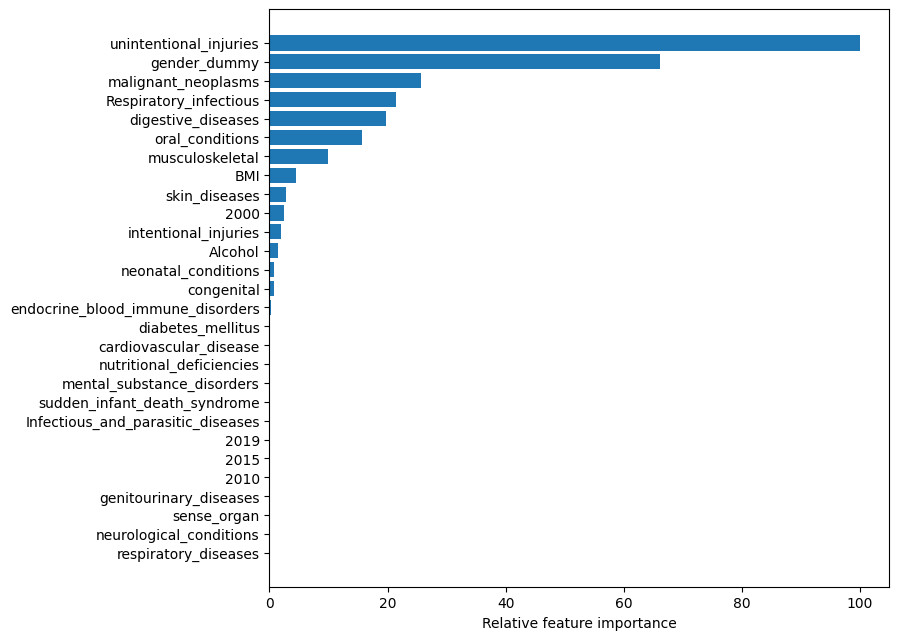

In [20]:
importance_plot(dtr_cv_acc, X_train)

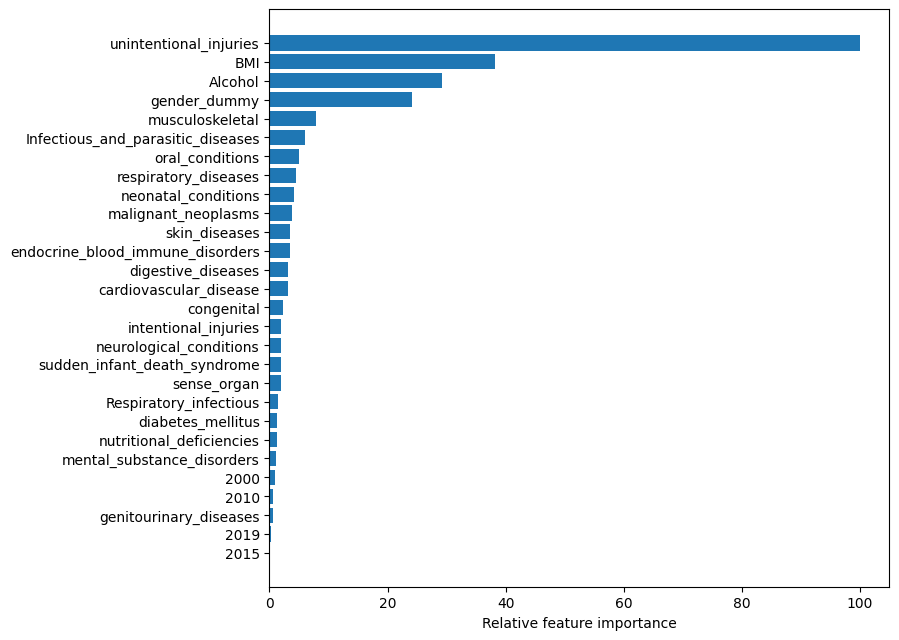

In [21]:
importance_plot(rf, X_train)

In [22]:
print('OSR2:', OSR2(rf, X_test, y_test, y_train))

OSR2: 0.7539100695101068


In [23]:
import statsmodels.api as sm #package to do linear regression

X_train_lin = sm.add_constant(X_train)
model_lin = sm.OLS(y_train, X_train_lin).fit()
print(model_lin.summary())

                               OLS Regression Results                               
Dep. Variable:     Life Expectancy at birth   R-squared:                       0.908
Model:                                  OLS   Adj. R-squared:                  0.880
Method:                       Least Squares   F-statistic:                     32.61
Date:                      Mon, 08 May 2023   Prob (F-statistic):           2.88e-35
Time:                              06:31:53   Log-Likelihood:                -262.31
No. Observations:                       117   AIC:                             580.6
Df Residuals:                            89   BIC:                             658.0
Df Model:                                27                                         
Covariance Type:                  nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [24]:
y_train

0      76.12
1      83.58
2      74.88
3      57.18
4      67.85
       ...  
112    77.66
113    67.57
114    68.12
115    70.77
116    78.51
Name: Life Expectancy at birth, Length: 117, dtype: float64

In [25]:
# # Creating a dataframe with the feature importance by sklearn
# feature_importance_rfoc = {}
# for i, feature in enumerate(features_rfoc):
#     feature_importance_rfoc[feature] = importance_rfoc[i]

# print(f"Feature importance by sklearn: {feature_importance_rfoc}")

# feature_importance_rfoc_df = pd.DataFrame.from_dict(feature_importance_rfoc, orient='index')
# feature_importance_rfoc_df

# feature_importance_rfoc_df['RF Tree'] = feature_importance_rfoc_df[0]
# feature_importance_rfoc_df = feature_importance_rfoc_df.drop([0], axis=1)
# feature_importance_rfoc_df.sort_values(by=feature_importance_rfoc_df.columns.tolist(), ascending=False)

# combined_df_new = feature_importance_oc_df.join(feature_importance_rfoc_df)
# combined_df_new.sort_values(by=['RF Tree'], ascending=False)

In [26]:
importance_rfoc = rf.feature_importances_

In [27]:
# Creating a dataframe with the feature importance by sklearn
feature_importance_oc = {}
for i, feature in enumerate(features):
    feature_importance_oc[feature] = importance[i]

print(f"Feature importance by sklearn: {feature_importance_oc}")

feature_importance_oc_df = pd.DataFrame.from_dict(feature_importance_oc, orient='index')
feature_importance_oc_df

feature_importance_oc_df['CART Tree'] = feature_importance_oc_df[0]
feature_importance_oc_df = feature_importance_oc_df.drop([0], axis=1)
feature_importance_oc_df.sort_values(by=feature_importance_oc_df.columns.tolist(), ascending=False)

# combined_df_new = feature_importance_oc_df.join(feature_importance_rfoc_df)
# combined_df_new.sort_values(by=['RF Tree'], ascending=False)

Feature importance by sklearn: {'BMI': 0.016454915109758564, 'Alcohol': 0.005506984537852196, 'gender_dummy': 0.24169611932434892, '2000': 0.008684686157597182, '2010': 0.0, '2015': 0.0, '2019': 0.0, 'Infectious_and_parasitic_diseases': 0.0, 'Respiratory_infectious': 0.07859773226721427, 'neonatal_conditions': 0.0030164732843486123, 'nutritional_deficiencies': 0.0, 'endocrine_blood_immune_disorders': 0.0011276051566806722, 'cardiovascular_disease': 0.0, 'respiratory_diseases': 0.0, 'digestive_diseases': 0.0723814301001606, 'genitourinary_diseases': 0.0, 'malignant_neoplasms': 0.09354639228497284, 'neurological_conditions': 0.0, 'unintentional_injuries': 0.36538530933946683, 'intentional_injuries': 0.006913552110918681, 'mental_substance_disorders': 0.0, 'sense_organ': 0.0, 'musculoskeletal': 0.036271836050289476, 'congenital': 0.0027682744191595467, 'sudden_infant_death_syndrome': 0.0, 'skin_diseases': 0.010131363894249387, 'diabetes_mellitus': 0.0, 'oral_conditions': 0.057517325962982

CART Tree
unintentional_injuries              0.365385
gender_dummy                        0.241696
malignant_neoplasms                 0.093546
Respiratory_infectious              0.078598
digestive_diseases                  0.072381
oral_conditions                     0.057517
musculoskeletal                     0.036272
BMI                                 0.016455
skin_diseases                       0.010131
2000                                0.008685
intentional_injuries                0.006914
Alcohol                             0.005507
neonatal_conditions                 0.003016
congenital                          0.002768
endocrine_blood_immune_disorders    0.001128
diabetes_mellitus                   0.000000
sudden_infant_death_syndrome        0.000000
sense_organ                         0.000000
mental_substance_disorders          0.000000
2019                                0.000000
Infectious_and_parasitic_diseases   0.000000
2010                                0.000000
genitourinary_diseases              0.000000
respiratory_diseases                0.000000
cardiovascular_disease              0.000000
nutritional_deficiencies            0.000000
2015                                0.000000
neurological_conditions             0.000000

In [28]:
# Creating a dataframe with the feature importance by sklearn
feature_importance_rfoc = {}
for i, feature in enumerate(features):
    feature_importance_rfoc[feature] = importance_rfoc[i]

print(f"Feature importance by sklearn: {feature_importance_rfoc}")

feature_importance_rfoc_df = pd.DataFrame.from_dict(feature_importance_rfoc, orient='index')
feature_importance_rfoc_df

feature_importance_rfoc_df['RF Tree'] = feature_importance_rfoc_df[0]
feature_importance_rfoc_df = feature_importance_rfoc_df.drop([0], axis=1)
feature_importance_rfoc_df.sort_values(by=feature_importance_rfoc_df.columns.tolist(), ascending=False)

combined_df_new = feature_importance_oc_df.join(feature_importance_rfoc_df)
combined_df_new.sort_values(by=['RF Tree'], ascending=False)

Feature importance by sklearn: {'BMI': 0.15042799044997457, 'Alcohol': 0.11501319634138452, 'gender_dummy': 0.09485289845121296, '2000': 0.00398990294405797, '2010': 0.0026737957066205863, '2015': 0.0005576677184322978, '2019': 0.001283179104892755, 'Infectious_and_parasitic_diseases': 0.023482568772501503, 'Respiratory_infectious': 0.005542405013212539, 'neonatal_conditions': 0.016608569947459753, 'nutritional_deficiencies': 0.00474814886986352, 'endocrine_blood_immune_disorders': 0.013906227168114271, 'cardiovascular_disease': 0.012241511769324153, 'respiratory_diseases': 0.017852968541461654, 'digestive_diseases': 0.012268642850155777, 'genitourinary_diseases': 0.0022696647763707726, 'malignant_neoplasms': 0.015066003581573372, 'neurological_conditions': 0.007957096425829832, 'unintentional_injuries': 0.39369126923807135, 'intentional_injuries': 0.007965545039015608, 'mental_substance_disorders': 0.0045675326742668455, 'sense_organ': 0.007497760225714008, 'musculoskeletal': 0.030781

CART Tree   RF Tree
unintentional_injuries              0.365385  0.393691
BMI                                 0.016455  0.150428
Alcohol                             0.005507  0.115013
gender_dummy                        0.241696  0.094853
musculoskeletal                     0.036272  0.030782
Infectious_and_parasitic_diseases   0.000000  0.023483
oral_conditions                     0.057517  0.019400
respiratory_diseases                0.000000  0.017853
neonatal_conditions                 0.003016  0.016609
malignant_neoplasms                 0.093546  0.015066
skin_diseases                       0.010131  0.013997
endocrine_blood_immune_disorders    0.001128  0.013906
digestive_diseases                  0.072381  0.012269
cardiovascular_disease              0.000000  0.012242
congenital                          0.002768  0.009013
intentional_injuries                0.006914  0.007966
neurological_conditions             0.000000  0.007957
sudden_infant_death_syndrome        0.000000  0.007550
sense_organ                         0.000000  0.007498
Respiratory_infectious              0.078598  0.005542
diabetes_mellitus                   0.000000  0.004793
nutritional_deficiencies            0.000000  0.004748
mental_substance_disorders          0.000000  0.004568
2000                                0.008685  0.003990
2010                                0.000000  0.002674
genitourinary_diseases              0.000000  0.002270
2019                                0.000000  0.001283
2015                                0.000000  0.000558